In [ ]:
#%% Import Files

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#%%

# Read the CSV file
df_raw = pd.read_csv('df_bin.csv')

<ipython-input-2-5a99c694dddf>:3: DtypeWarning: Columns (10,73,101,108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('df_bin.csv')


In [ ]:
#%%

# Filter the data to include only instances where arrests were made
df_filtered = df_raw[df_raw['arstmade'] != 'Y'].copy()

In [ ]:
#%%

# Drop rows with missing values
df_filtered.dropna(inplace=True)

In [ ]:
#%%

# Encode the 'race' column into dummy variables
dummies = pd.get_dummies(df_filtered['race'])

In [ ]:
#%%

# Include the 'age' column in the encoded dataframe
dummies['age'] = df_filtered['age']

In [ ]:
#%%

# Remove duplicate rows
dummies.drop_duplicates(inplace=True)

In [ ]:
#%%

# Group the data per instance
grouped_df = dummies.groupby('age').sum()

In [ ]:
#%%

# Find frequent itemsets
frequent_itemsets = apriori(grouped_df, min_support=0.2, use_colnames=True)

d:\SAIT\aDATA475\VS_Python\Final Assignment\.venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
#%%

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

In [ ]:
#%%

# Display the association rules
print(rules)

                                           antecedents  \
0                     (AMERICAN INDIAN/ALASKAN NATIVE)   
1                     (AMERICAN INDIAN/ALASKAN NATIVE)   
2                     (AMERICAN INDIAN/ALASKAN NATIVE)   
3                     (AMERICAN INDIAN/ALASKAN NATIVE)   
4                     (AMERICAN INDIAN/ALASKAN NATIVE)   
...                                                ...   
1459  (WHITE-HISPANIC, AMERICAN INDIAN/ALASKAN NATIVE)   
1460           (OTHER, AMERICAN INDIAN/ALASKAN NATIVE)   
1461                           (OTHER, BLACK-HISPANIC)   
1462                           (WHITE-HISPANIC, OTHER)   
1463                  (AMERICAN INDIAN/ALASKAN NATIVE)   

                                            consequents  antecedent support  \
0                              (ASIAN/PACIFIC ISLANDER)            0.559524   
1                                               (BLACK)            0.559524   
2                                      (BLACK-HISPANIC)           

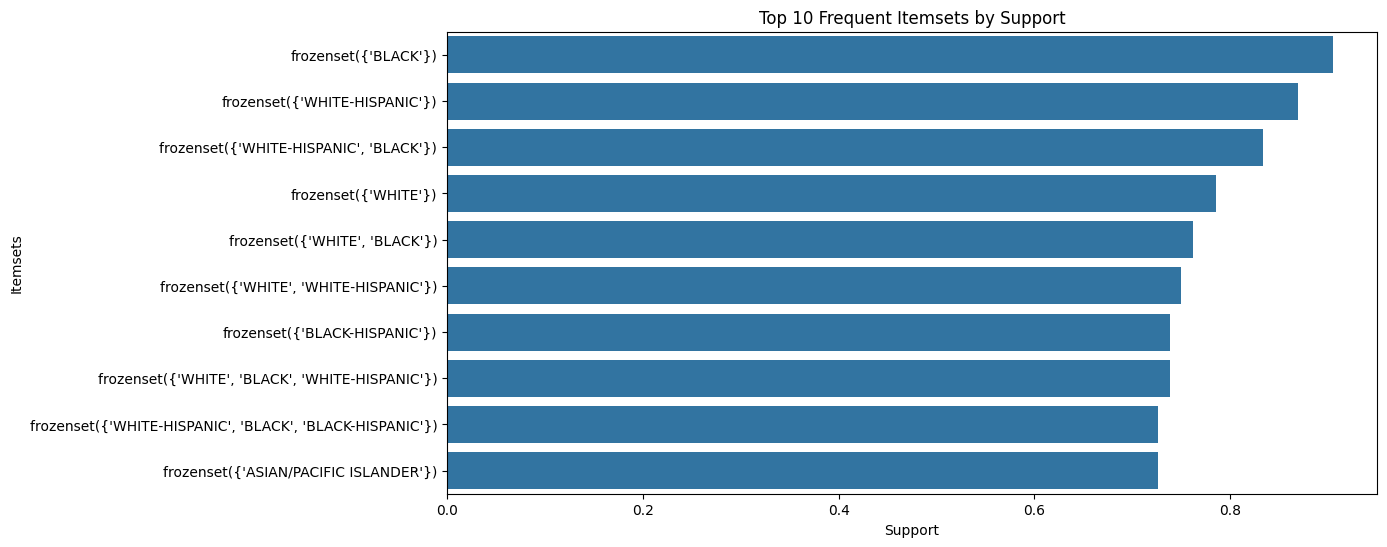

In [ ]:
#%%

# Bar chart of frequent itemsets
plt.figure(figsize=(12, 6))
top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
sns.barplot(x='support', y='itemsets', data=top_itemsets)
plt.title('Top 10 Frequent Itemsets by Support')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

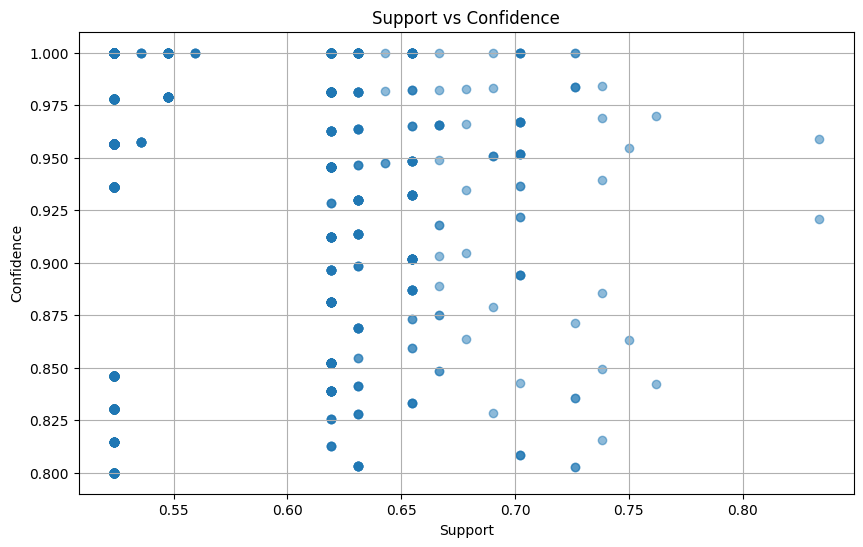

In [ ]:
#%%

# Create a scatter plot for Support vs Confidence
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.grid(True)
plt.show()